In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter


%matplotlib inline

# Global terrorism

In [2]:
# Reading the data set

df = pd.read_excel("globalterrorism.xlsx")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df['date'] = str(df.iyear) + "-" + str(df.imonth) + "-" + str(df.iday)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,0 1970\n1 1970\n2 1970...
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0 1970\n1 1970\n2 1970...
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0 1970\n1 1970\n2 1970...
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0 1970\n1 1970\n2 1970...
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0 1970\n1 1970\n2 1970...


## Where did terrorist attacks happen the most since 1970?

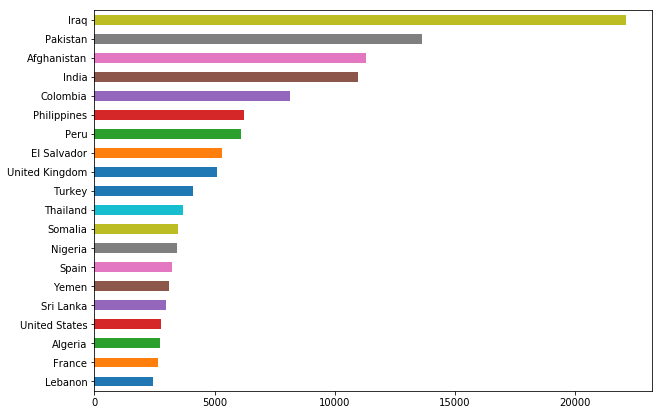

In [4]:
# per country 

df.country_txt.value_counts().head(20).sort_values(ascending=True).plot(kind='barh', figsize=(10,7))

In [5]:
# per region 

df.region_txt.value_counts().head(20).sort_values(ascending=False)#.plot(kind='barh', figsize=(10,7))

Middle East & North Africa     46511
South Asia                     41497
South America                  18762
Western Europe                 16307
Sub-Saharan Africa             15491
Southeast Asia                 11453
Central America & Caribbean    10340
Eastern Europe                  5031
North America                   3346
East Asia                        794
Central Asia                     554
Australasia & Oceania            264
Name: region_txt, dtype: int64

**What was the most common target?** 

In [6]:
df.target1.value_counts().head(20)

Civilians         5810
Unknown           4892
Soldiers          2688
Patrol            2616
Checkpoint        2562
Vehicle           2397
Officers          1554
Military Unit     1533
Village           1406
Bus               1308
Unit              1193
Police Station    1113
Convoy            1053
Market            1031
Office             809
House              761
Base               735
Checkpost          661
Bank               649
Post               621
Name: target1, dtype: int64

**What were the most used weapons?**

In [7]:
df.weaptype1_txt.value_counts().head(20)

Explosives/Bombs/Dynamite                                                      86704
Firearms                                                                       55273
Unknown                                                                        13852
Incendiary                                                                     10459
Melee                                                                           3338
Chemical                                                                         293
Sabotage Equipment                                                               130
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      116
Other                                                                            104
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

**What type of attacks were these?**

In [8]:
df.attacktype1_txt.value_counts().head(20)

Bombing/Explosion                      83073
Armed Assault                          40223
Assassination                          18402
Hostage Taking (Kidnapping)            10233
Facility/Infrastructure Attack          9581
Unknown                                 6425
Unarmed Assault                          913
Hostage Taking (Barricade Incident)      902
Hijacking                                598
Name: attacktype1_txt, dtype: int64

In [9]:
df.success.value_counts().head(20)

1    152701
0     17649
Name: success, dtype: int64

**Where did people die the most?**

In [10]:
df.groupby('country_txt').nkill.sum().sort_values(ascending=False).head(20)

country_txt
Iraq           71082.0
Afghanistan    33146.0
Pakistan       22734.0
Nigeria        20665.0
India          18842.0
Sri Lanka      15528.0
Colombia       14600.0
Syria          13132.0
Peru           12763.0
El Salvador    12053.0
Algeria        11091.0
Nicaragua      10598.0
Philippines     9058.0
Somalia         8254.0
Yemen           8011.0
Turkey          6664.0
Guatemala       5167.0
Russia          4246.0
Burundi         4182.0
Lebanon         4038.0
Name: nkill, dtype: float64

**What is the most commom mode for claim of responsibilty?**

In [11]:
df.claimmode_txt.value_counts().head(20)

Personal claim                   4128
Posted to website, blog, etc.    3689
Unknown                          3673
Call (post-incident)             1724
Note left at scene                980
E-mail                            797
Other                             451
Letter                            329
Video                             308
Call (pre-incident)               169
Name: claimmode_txt, dtype: int64

**Interesting, but still too general. Let's look at the data from each decade individually.**

In [12]:
df_70 = df[(df.iyear >= 1970) & (df.iyear < 1980)]

In [13]:
df_80 = df[(df.iyear >= 1980) & (df.iyear < 1990)]

In [14]:
df_90 = df[(df.iyear >= 1990) & (df.iyear < 2000)]

In [15]:
df_00 = df[(df.iyear >= 2000) & (df.iyear < 2010)]

In [16]:
df_10 = df[df.iyear >= 2010]

In [17]:
df_70.country_txt.value_counts().head(20)

United Kingdom        1635
United States         1471
Italy                 1022
Spain                  901
Turkey                 484
France                 473
El Salvador            445
Colombia               419
Argentina              324
Nicaragua              290
West Germany (FRG)     273
Israel                 179
Iran                   177
Greece                 143
Philippines            124
Guatemala              121
Mexico                 114
Lebanon                100
Japan                   75
Chile                   72
Name: country_txt, dtype: int64

In [18]:
df_80.country_txt.value_counts().head(20)

Peru                        4223
El Salvador                 4123
Colombia                    2951
Chile                       1744
Guatemala                   1483
Nicaragua                   1481
Spain                       1341
Sri Lanka                   1319
United Kingdom              1317
Lebanon                     1248
India                       1228
South Africa                 999
Philippines                  918
France                       855
United States                517
Israel                       455
Turkey                       340
West Bank and Gaza Strip     315
Argentina                    302
Italy                        299
Name: country_txt, dtype: int64

In [19]:
df_90.country_txt.value_counts().head(20)

Colombia                    2833
India                       1788
Peru                        1781
Turkey                      1665
Pakistan                    1604
Algeria                     1389
United Kingdom              1214
Philippines                  946
France                       919
South Africa                 845
Sri Lanka                    841
El Salvador                  752
West Bank and Gaza Strip     597
Spain                        586
Germany                      531
Lebanon                      521
Bangladesh                   473
Chile                        454
Guatemala                    427
Egypt                        424
Name: country_txt, dtype: int64

In [20]:
df_00.country_txt.value_counts().head(20)

Iraq                        5170
India                       2566
Pakistan                    1979
Afghanistan                 1948
Thailand                    1227
Algeria                     1120
Philippines                 1022
Colombia                    1016
Russia                       973
Sri Lanka                    768
Nepal                        594
Israel                       570
West Bank and Gaza Strip     550
Somalia                      486
Spain                        400
Indonesia                    343
United Kingdom               316
Greece                       281
Turkey                       260
Nigeria                      257
Name: country_txt, dtype: int64

In [21]:
df_10.country_txt.value_counts().head(20)

Iraq                        16799
Pakistan                     9838
Afghanistan                  9234
India                        5372
Philippines                  3202
Nigeria                      3080
Yemen                        2906
Somalia                      2827
Thailand                     2215
Libya                        2037
Syria                        1800
Egypt                        1678
Ukraine                      1615
Turkey                       1357
Colombia                      944
Bangladesh                    879
Russia                        857
West Bank and Gaza Strip      654
Sudan                         640
United Kingdom                616
Name: country_txt, dtype: int64

**Let's create a dataframe for terrorist attacks that happened in the US.** 

We're going to do a bunch of analysis with it later.

In [22]:
df_usa = df[df.country_txt == 'United States']
df_usa.shape

# There were 2757 attacks in the US from 1970 to 2016.

(2757, 136)

**What were the most targeted provinces?**

In [23]:
df_usa.provstate.value_counts().head(15)

California              586
New York                503
Puerto Rico             247
Florida                 153
Illinois                110
Washington               98
District of Columbia     83
Oregon                   65
Texas                    59
Massachusetts            57
Ohio                     51
New Jersey               47
Michigan                 44
Colorado                 44
Virginia                 39
Name: provstate, dtype: int64

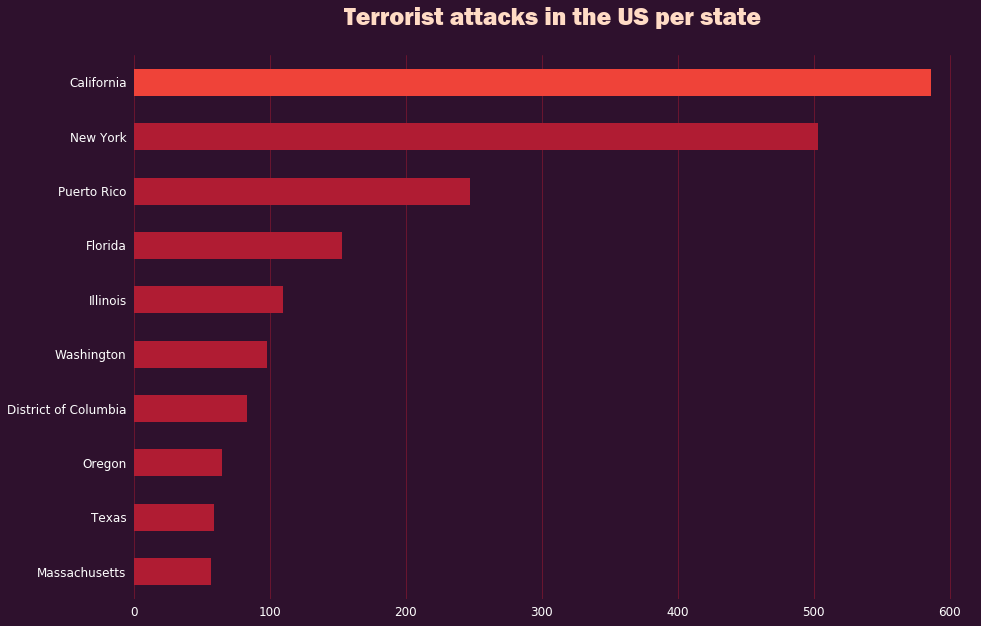

In [82]:
#plt.style.use('dark_background')

bar_colors = ['#b01c33', '#b01c33', '#b01c33', '#b01c33', '#b01c33', '#b01c33', '#b01c33', '#b01c33', '#b01c33', '#ef4339']

ax = df_usa.provstate.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color=bar_colors, figsize=(15,10))

ax.set_title('Terrorist attacks in the US per state', pad=30)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#b01c33', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)


plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#2e112d', # colors the outside
    'axes.facecolor': '#2e112d', # colors the inside 
    'font.size': 12,
    'text.color': '#ffdbc5',
    'axes.labelcolor': '#ffdbc5'
})

plt.savefig("attacks-state.pdf")

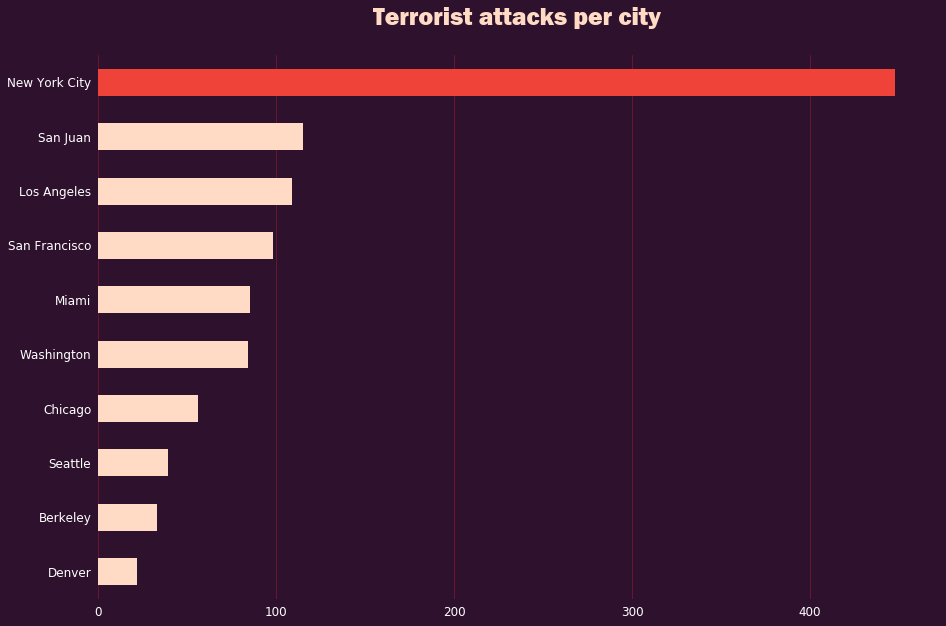

In [83]:
bar_colors = ['#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ffdbc5', '#ef4339']

ax = df_usa.city.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', x='city', color=bar_colors, figsize=(15,10))

ax.set_title('Terrorist attacks per city', pad=30)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#b01c33', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)


plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#2e112d', # colors the outside
    'axes.facecolor': '#2e112d', # colors the inside 
    'font.size': 12,
    'text.color': '#ffdbc5',
    'axes.labelcolor': '#ffdbc5'
})

plt.savefig("attacks-city.pdf")

**In what year attacks killed the most?** 

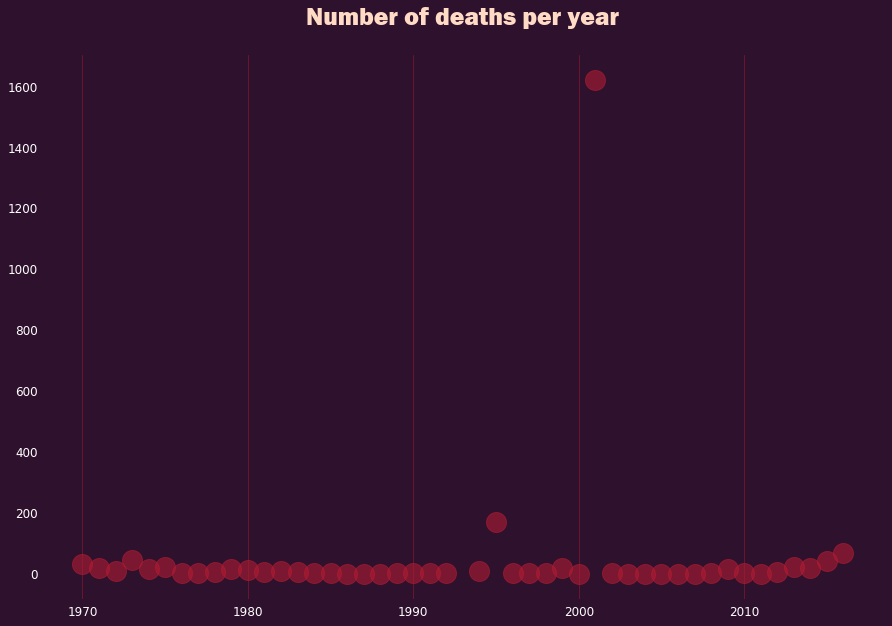

In [84]:
ax = df_usa.groupby('iyear').nkill.sum().plot(marker='o', linestyle='', color='#b01c33', markersize=20, alpha=0.6, figsize=(15,10))

ax.set_title('Number of deaths per year', pad=30)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#b01c33', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.xaxis.label.set_visible(False)


plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#2e112d', # colors the outside
    'axes.facecolor': '#2e112d', # colors the inside 
    'font.size': 12,
    'text.color': '#ffdbc5',
    'axes.labelcolor': '#ffdbc5'
})

plt.savefig("deaths-year.pdf")

In [27]:
# That was kind of obvious, 2001, by far. 

In [28]:
df_usa.dtypes

eventid                        int64
iyear                          int64
imonth                         int64
iday                           int64
approxdate                    object
extended                       int64
resolution            datetime64[ns]
country                        int64
country_txt                   object
region                         int64
region_txt                    object
provstate                     object
city                          object
latitude                     float64
longitude                    float64
specificity                  float64
vicinity                       int64
location                      object
summary                       object
crit1                          int64
crit2                          int64
crit3                          int64
doubtterr                      int64
alternative                  float64
alternative_txt               object
multiple                       int64
success                        int64
s

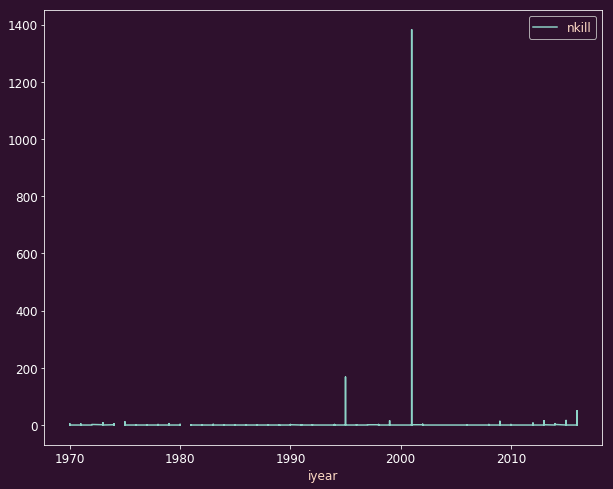

In [72]:
df_usa.plot(kind='line', x='iyear', y='nkill', figsize=(10,8))

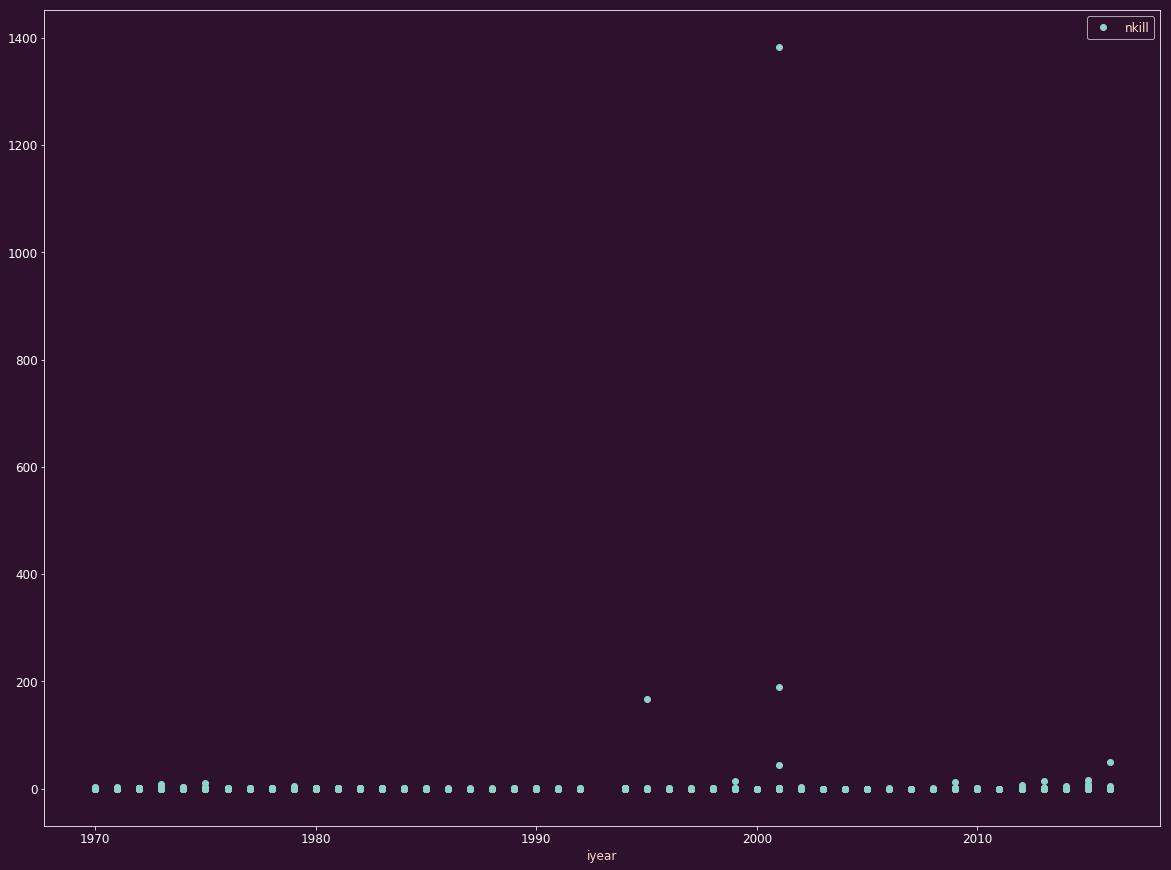

In [73]:
df_usa.plot(marker='o', linestyle='', x='iyear', y='nkill', figsize=(20,15))

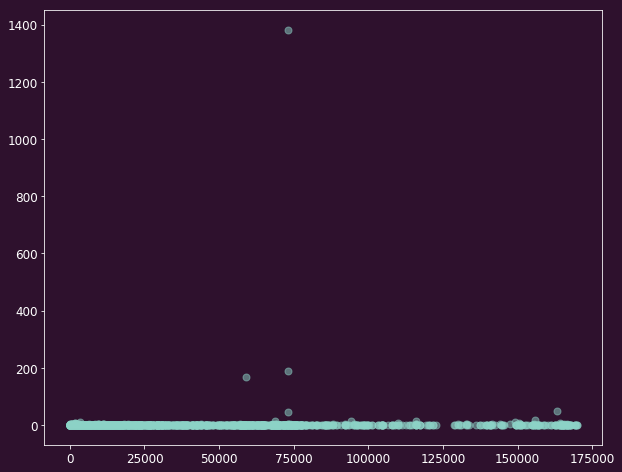

In [74]:
df_usa.nkill.plot(marker='o', linestyle='', markersize=7, alpha=0.5, figsize=(10,8))

In [32]:
df_usa.groupby('iyear').weaptype1_txt.value_counts()

iyear  weaptype1_txt                                                              
1970   Explosives/Bombs/Dynamite                                                      280
       Incendiary                                                                     147
       Firearms                                                                        35
       Chemical                                                                         2
       Melee                                                                            2
       Fake Weapons                                                                     1
       Sabotage Equipment                                                               1
1971   Explosives/Bombs/Dynamite                                                      144
       Incendiary                                                                      75
       Firearms                                                                        24
       Melee     

In [33]:
df_70_usa = df_70[df_70.country_txt == 'United States']

In [34]:
df_80_usa = df_80[df_80.country_txt == 'United States']

In [35]:
df_90_usa = df_90[df_90.country_txt == 'United States']

In [36]:
df_00_usa = df_00[df_00.country_txt == 'United States']

In [37]:
df_10_usa = df_10[df_10.country_txt == 'United States']

In [38]:
df_70_usa.weaptype1_txt.value_counts()

Explosives/Bombs/Dynamite    942
Incendiary                   315
Firearms                     170
Unknown                       17
Chemical                      11
Melee                         11
Fake Weapons                   3
Sabotage Equipment             1
Other                          1
Name: weaptype1_txt, dtype: int64

In [39]:
df_80_usa.weaptype1_txt.value_counts()

Explosives/Bombs/Dynamite    277
Incendiary                   126
Firearms                      75
Unknown                       20
Sabotage Equipment             8
Biological                     4
Melee                          3
Chemical                       2
Other                          1
Radiological                   1
Name: weaptype1_txt, dtype: int64

In [40]:
df_90_usa.weaptype1_txt.value_counts()

Incendiary                   173
Explosives/Bombs/Dynamite     98
Firearms                      65
Other                         13
Melee                          9
Sabotage Equipment             5
Unknown                        2
Chemical                       2
Fake Weapons                   1
Name: weaptype1_txt, dtype: int64

In [41]:
df_00_usa.weaptype1_txt.value_counts()

Incendiary                                                                     125
Explosives/Bombs/Dynamite                                                       41
Biological                                                                      16
Firearms                                                                        10
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      7
Sabotage Equipment                                                               3
Melee                                                                            3
Chemical                                                                         2
Other                                                                            1
Fake Weapons                                                                     1
Name: weaptype1_txt, dtype: int64

In [42]:
df_10_usa.weaptype1_txt.value_counts()

Incendiary                                                                     83
Firearms                                                                       53
Explosives/Bombs/Dynamite                                                      34
Melee                                                                          11
Biological                                                                      4
Chemical                                                                        4
Other                                                                           1
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     1
Sabotage Equipment                                                              1
Name: weaptype1_txt, dtype: int64

In [43]:
df_usa.weaptype1_txt.value_counts()

Explosives/Bombs/Dynamite                                                      1392
Incendiary                                                                      822
Firearms                                                                        373
Unknown                                                                          39
Melee                                                                            37
Biological                                                                       24
Chemical                                                                         21
Sabotage Equipment                                                               18
Other                                                                            17
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       8
Fake Weapons                                                                      5
Radiological                                                                

**Who were the most targeted groups?**

In [44]:
df_usa.groupby('targsubtype1_txt').targtype1_txt.value_counts().head(15).sort_values(ascending=False)

targsubtype1_txt                                      targtype1_txt                 
Clinics                                               Abortion Related                  239
Bank/Commerce                                         Business                          221
Embassy/Consulate                                     Government (Diplomatic)            63
Electricity                                           Utilities                          59
Diplomatic Personnel (outside of embassy, consulate)  Government (Diplomatic)            37
Airport                                               Airports & Aircraft                26
Domestic NGO                                          NGO                                24
Construction                                          Business                           23
Aircraft (not at an airport)                          Airports & Aircraft                16
Airline Officer/Personnel                             Airports & Aircraft              

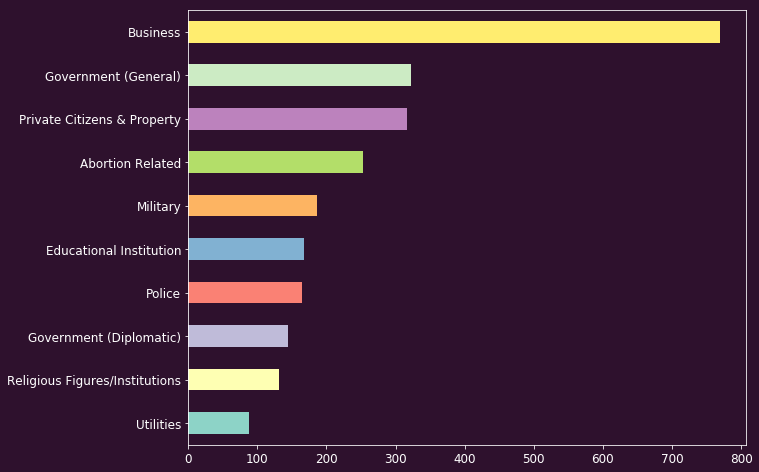

In [75]:
df_usa.targtype1_txt.value_counts().head(10).sort_values(ascending=True).plot(kind='barh',figsize=(10,8)) 

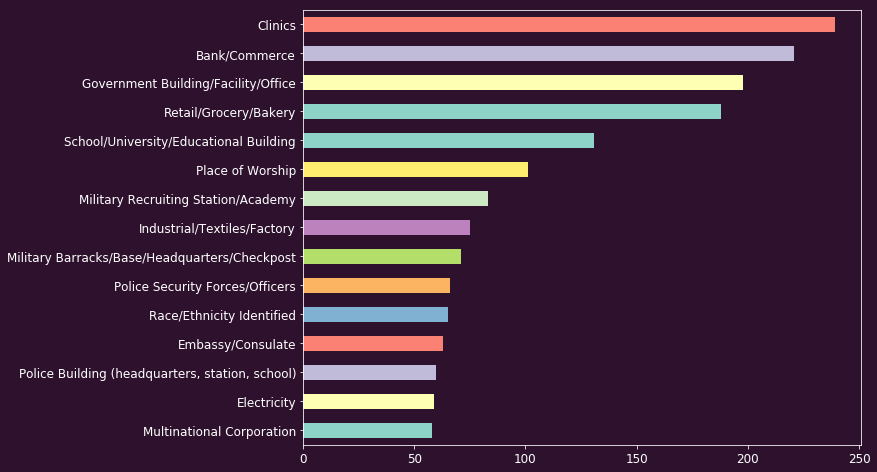

In [76]:
df_usa.targsubtype1_txt.value_counts().head(15).sort_values(ascending=True).plot(kind='barh', figsize=(10,8)) 

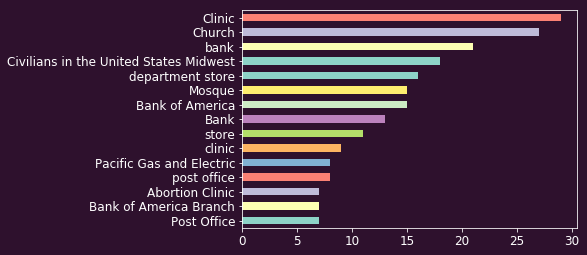

In [77]:
df_usa.target1.value_counts().head(15).sort_values(ascending=True).plot(kind='barh') 

# figure out how to ignore case and merge rows 

**What were the motivations of these attacks?**

In [48]:
df_usa.motive.value_counts()

Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                               178
To kill police                                                                                                                                                                                                                                                                                                                                                                                                                                                         24
The specific motive for the attack is unknown.                                      

**What type of attacks were these?**

In [49]:
df_usa.attacktype1_txt.value_counts()

Bombing/Explosion                      1378
Facility/Infrastructure Attack          838
Armed Assault                           249
Assassination                           128
Hostage Taking (Barricade Incident)      59
Unarmed Assault                          58
Hostage Taking (Kidnapping)              20
Hijacking                                16
Unknown                                  11
Name: attacktype1_txt, dtype: int64

**What's the correlation between the perpetrator's nationality and the location of the attack?** 

Was the attack logistically international or domestic?

In [50]:
df_usa.INT_LOG.value_counts()

-9    1373
 0    1053
 1     331
Name: INT_LOG, dtype: int64

Looks like the majority is unknown (-9), more than 1,000 were domestic and only 331 were international.

**What's the average number of perpetrators?**

In [51]:
perpetrators = df_usa.nperps.reset_index()
perpetrators

# -99 means unknown

,index,nperps
0,5,-99.0
1,7,-99.0
2,8,1.0
3,9,1.0
4,10,NaN
5,11,-99.0
6,13,-99.0
7,14,-99.0
8,17,-99.0
9,18,-99.0


In [52]:
# Let's drop the unknowns so we can take the average number 

perpetrators.drop([0])

,index,nperps
1,7,-99.0
2,8,1.0
3,9,1.0
4,10,NaN
5,11,-99.0
6,13,-99.0
7,14,-99.0
8,17,-99.0
9,18,-99.0
10,19,-99.0


In [53]:
perpetrators[perpetrators.nperps == -99].dropna()

,index,nperps
0,5,-99.0
1,7,-99.0
5,11,-99.0
6,13,-99.0
7,14,-99.0
8,17,-99.0
9,18,-99.0
10,19,-99.0
11,20,-99.0
14,24,-99.0


In [54]:
perpetrators

,index,nperps
0,5,-99.0
1,7,-99.0
2,8,1.0
3,9,1.0
4,10,NaN
5,11,-99.0
6,13,-99.0
7,14,-99.0
8,17,-99.0
9,18,-99.0


In [81]:
df_usa.success.value_counts()

1    2273
0     484
Name: success, dtype: int64